In [131]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter, datasets, CoxPHFitter, WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test

In [125]:
import pandas as pd
import numpy as np

# Definindo a semente para reprodutibilidade
np.random.seed(42)

# Número total de pacientes em cada grupo
n_patients = 100

# Geração dos tempos de acompanhamento (dias)
time_group_A = np.random.exponential(100, n_patients)
time_group_B = np.random.exponential(250, n_patients)

# Indicador de evento: 1 - evento ocorreu, 0 - evento não ocorreu
event_group_A = np.random.choice([0, 1], n_patients, p=[0.7, 0.3])
event_group_B = np.random.choice([0, 1], n_patients, p=[0.6, 0.4])

# Criando os DataFrames
data_group_A = pd.DataFrame({
    'Group': 'A',
    'Time': time_group_A,
    'Event': event_group_A
})

data_group_B = pd.DataFrame({
    'Group': 'B',
    'Time': time_group_B,
    'Event': event_group_B
})

# Concatenando os DataFrames em uma única base de dados
data = pd.concat([data_group_A, data_group_B], ignore_index=True)

# Ordenando a base de dados pelo tempo de acompanhamento
data = data.sort_values(by='Time')

In [126]:
data

,Group,Time,Event
72,A,0.553742,1
128,B,1.744102,0
10,A,2.079931,0
98,A,2.574777,0
42,A,3.499372,1
...,...,...,...
178,B,690.085954,1
134,B,715.780281,0
140,B,820.502466,0
139,B,891.949535,0


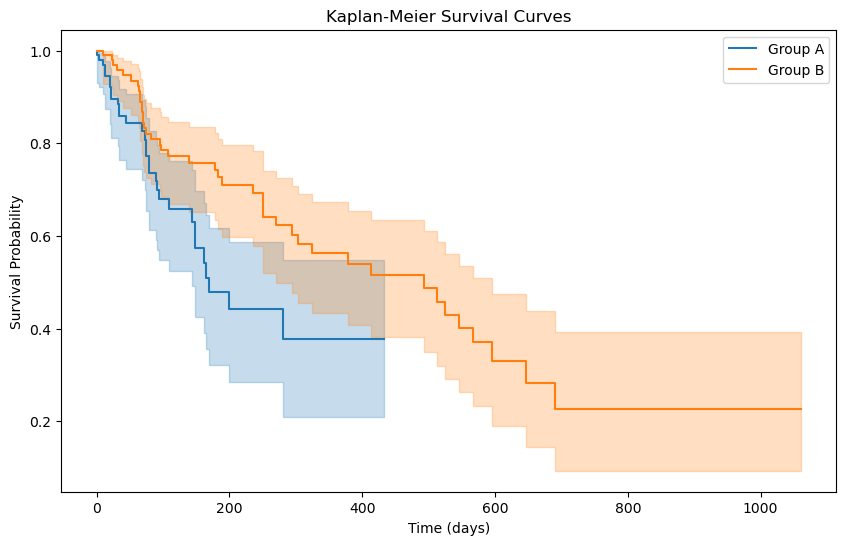

In [127]:
# Create KaplanMeierFitter objects for each group
# Separate the data for each group
group_A_data = data[data['Group'] == 'A']
group_B_data = data[data['Group'] == 'B']

kmf_A = KaplanMeierFitter()
kmf_B = KaplanMeierFitter()

# Fit the data for each group
kmf_A.fit(group_A_data['Time'], event_observed=group_A_data['Event'], label='Group A')
kmf_B.fit(group_B_data['Time'], event_observed=group_B_data['Event'], label='Group B')

# Plot the Kaplan-Meier curves
plt.figure(figsize=(10, 6))
kmf_A.plot()
kmf_B.plot()

# Add labels, title, and legend
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curves')
plt.legend()

# Display the plot
plt.show()

In [128]:
results = logrank_test(group_A_data['Time'], group_B_data['Time'], event_observed_A=group_A_data['Event'], event_observed_B=group_B_data['Event'])
print("Log-Rank Test p-value:", results.p_value)

Log-Rank Test p-value: 0.01272804029018833


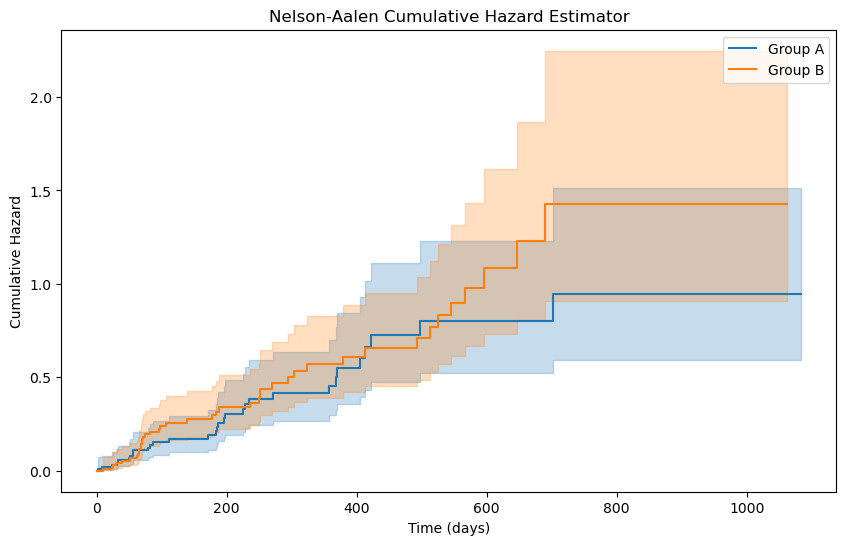

In [21]:
# Create NelsonAalenFitter objects for each group
naf_A = NelsonAalenFitter()
naf_B = NelsonAalenFitter()

# Fit the data for each group
naf_A.fit(group_A_data['Time'], event_observed=group_A_data['Event'], label='Group A')
naf_B.fit(group_B_data['Time'], event_observed=group_B_data['Event'], label='Group B')

# Plot the Nelson-Aalen curves
plt.figure(figsize=(10, 6))
naf_A.plot()
naf_B.plot()

# Add labels, title, and legend
plt.xlabel('Time (days)')
plt.ylabel('Cumulative Hazard')
plt.title('Nelson-Aalen Cumulative Hazard Estimator')
plt.legend()

# Display the plot
plt.show()

In [50]:
from sksurv.datasets import load_veterans_lung_cancer

data_x, data_y = load_veterans_lung_cancer()
data_y

array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

In [42]:
data_x

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
...,...,...,...,...,...,...
132,65.0,large,75.0,1.0,no,test
133,64.0,large,60.0,5.0,no,test
134,67.0,large,70.0,18.0,yes,test
135,65.0,large,80.0,4.0,no,test


In [40]:
data_x["Treatment"].value_counts()

standard    69
test        68
Name: Treatment, dtype: int64

In [44]:
data_y["Status"]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

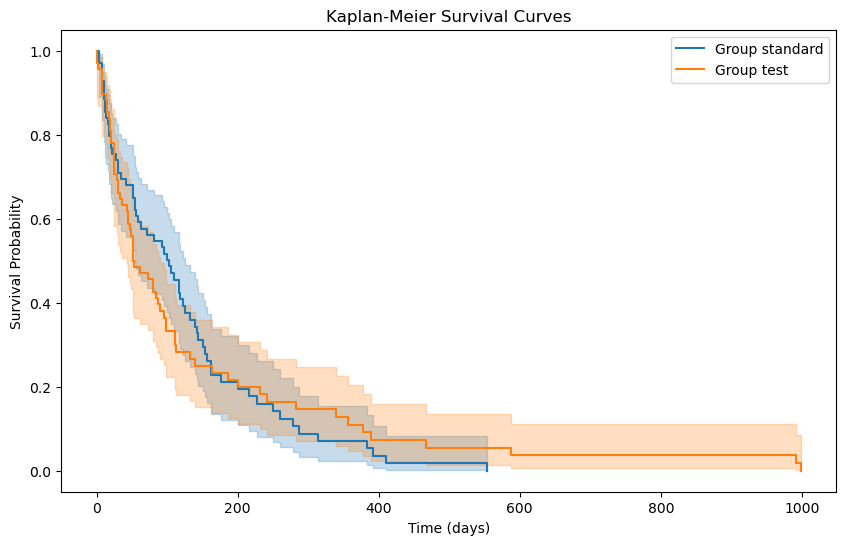

In [45]:
# Create KaplanMeierFitter objects for each group
# Separate the data for each group
group_A_data = data_y[data_x['Treatment'] == 'standard']
group_B_data = data_y[data_x['Treatment'] == 'test']

kmf_A = KaplanMeierFitter()
kmf_B = KaplanMeierFitter()

# Fit the data for each group
kmf_A.fit(group_A_data["Survival_in_days"], event_observed=group_A_data["Status"], label='Group standard')
kmf_B.fit(group_B_data["Survival_in_days"], event_observed=group_B_data["Status"], label='Group test')

# Plot the Kaplan-Meier curves
plt.figure(figsize=(10, 6))
kmf_A.plot()
kmf_B.plot()

# Add labels, title, and legend
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curves')
plt.legend()

# Display the plot
plt.show()

In [51]:
from sksurv.preprocessing import OneHotEncoder

data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
0,69.0,0.0,0.0,1.0,60.0,7.0,0.0,0.0
1,64.0,0.0,0.0,1.0,70.0,5.0,1.0,0.0
2,38.0,0.0,0.0,1.0,60.0,3.0,0.0,0.0
3,63.0,0.0,0.0,1.0,60.0,9.0,1.0,0.0
4,65.0,0.0,0.0,1.0,70.0,11.0,1.0,0.0


In [ ]:
data_x_numeric['Survival_in_days'] = data_y['Survival_in_days']
data_x_numeric['Status'] = data_y['Status']

In [57]:
data_x_numeric.columns = data_x_numeric.columns.str.replace('=', '_')

In [59]:
cph = CoxPHFitter()
formula = 'Age_in_years + Celltype_large + Celltype_smallcell + Celltype_squamous + Karnofsky_score + Months_from_Diagnosis + Prior_therapy_yes + Treatment_test'
cph.fit(data_x_numeric, duration_col='Survival_in_days', event_col='Status', formula=formula)

<lifelines.CoxPHFitter: fitted with 137 total observations, 9 right-censored observations>

In [82]:
individual_hazard_ratio = cph.predict_partial_hazard(data_x_numeric)
individual_hazard_ratio

0      0.396932
1      0.320717
2      0.519740
3      0.449328
4      0.318095
         ...   
132    0.503586
133    0.831329
134    0.627291
135    0.427487
136    2.814103
Length: 137, dtype: float64

In [60]:
print(cph.summary)

                           coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                              
Age_in_years          -0.008706   0.991332  0.009300       -0.026935   
Celltype_large        -0.794785   0.451678  0.302878       -1.388415   
Celltype_smallcell    -0.334519   0.715682  0.275978       -0.875425   
Celltype_squamous     -1.196075   0.302379  0.300917       -1.785861   
Karnofsky_score       -0.032816   0.967717  0.005508       -0.043611   
Months_from_Diagnosis  0.000083   1.000083  0.009136       -0.017823   
Prior_therapy_yes      0.071586   1.074210  0.232305       -0.383724   
Treatment_test         0.294605   1.342596  0.207550       -0.112185   

                       coef upper 95%  exp(coef) lower 95%  \
covariate                                                    
Age_in_years                 0.009522             0.973425   
Celltype_large              -0.201155             0.249471   
Celltype_smallcell           0.

In [66]:
sample_patient = data_x_numeric.loc[0]
survival_probability = cph.predict_survival_function(sample_patient).reset_index()

In [76]:
survival_probability = survival_probability.rename(columns={'index':'Time', 0:'Survival_Probability'})

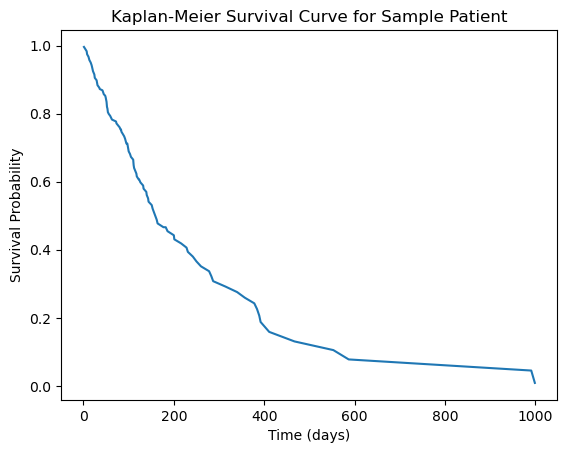

In [79]:
# Plot the Kaplan-Meier survival curve for the sample patient
plt.plot(survival_probability.Time, survival_probability.Survival_Probability)
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curve for Sample Patient')
plt.show()

AttributeError: CoxPHFitter has no attribute 'coef_'

-0.008706248697675384

In [ ]:
formula = 'Age_in_years + Celltype_large + Celltype_smallcell + Celltype_squamous + Karnofsky_score + Months_from_Diagnosis + Prior_therapy_yes + Treatment_test'


In [101]:
baseline = 17.18320

In [105]:
baseline*np.exp(data_x_numeric.loc[2]['Age_in_years']*cph.summary.coef['Age_in_years']+
data_x_numeric.loc[2]['Celltype_large']*cph.summary.coef['Celltype_large']+
data_x_numeric.loc[2]['Celltype_smallcell']*cph.summary.coef['Celltype_smallcell']+
data_x_numeric.loc[2]['Celltype_squamous']*cph.summary.coef['Celltype_squamous']+
data_x_numeric.loc[2]['Karnofsky_score']*cph.summary.coef['Karnofsky_score']+
data_x_numeric.loc[2]['Months_from_Diagnosis']*cph.summary.coef['Months_from_Diagnosis']+
data_x_numeric.loc[2]['Prior_therapy_yes']*cph.summary.coef['Prior_therapy_yes']+
data_x_numeric.loc[2]['Treatment_test']*cph.summary.coef['Treatment_test'])

0.5211741186243486

In [90]:
individual_hazard_ratio[0]

0.39693201282902346

In [104]:
individual_hazard_ratio

0      0.396932
1      0.320717
2      0.519740
3      0.449328
4      0.318095
         ...   
132    0.503586
133    0.831329
134    0.627291
135    0.427487
136    2.814103
Length: 137, dtype: float64

In [96]:
individual_hazard_ratio

0      0.396932
1      0.320717
2      0.519740
3      0.449328
4      0.318095
         ...   
132    0.503586
133    0.831329
134    0.627291
135    0.427487
136    2.814103
Length: 137, dtype: float64

In [132]:
aft_weibull = WeibullAFTFitter()

# Fit the Weibull AFT model to the data
aft_weibull.fit(data_x_numeric, duration_col='Survival_in_days', event_col='Status')
# Get the survival function from the Weibull AFT model
# Here, we calculate the survival probability at time t=50
t = 50

In [139]:
survival_prob = aft_weibull.predict_survival_function(sample_patient).reset_index()
survival_prob = survival_prob.rename(columns={'index':'Time', 0:'Survival_Probability'})

In [140]:
survival_prob

,Time,Survival_Probability
0,1.0,0.997287
1,2.0,0.994284
2,3.0,0.991166
3,4.0,0.987975
4,7.0,0.978134
...,...,...
96,467.0,0.129757
97,553.0,0.086292
98,587.0,0.073336
99,991.0,0.010118


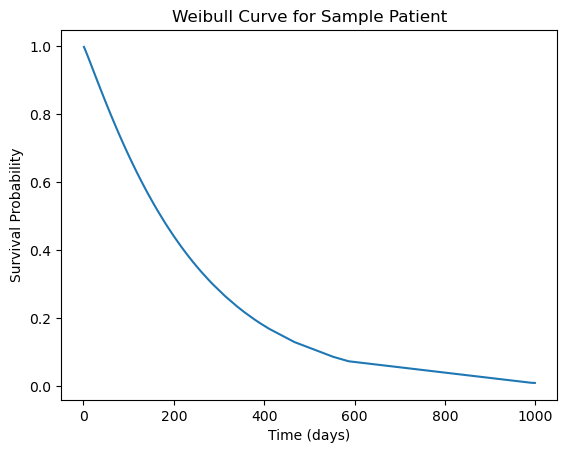

In [141]:
# Plot the Kaplan-Meier survival curve for the sample patient
plt.plot(survival_prob.Time, survival_prob.Survival_Probability)
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.title('Weibull Curve for Sample Patient')
plt.show()

In [205]:
aft_weibull.params_['rho_']

covariate
Intercept    0.074598
dtype: float64

In [209]:
lambda_v = np.exp(2.129280+data_x_numeric.loc[0]['Age_in_years']*aft_weibull.params_['lambda_']['Age_in_years']+
data_x_numeric.loc[0]['Celltype_large']*aft_weibull.params_['lambda_']['Celltype_large']+
data_x_numeric.loc[0]['Celltype_smallcell']*aft_weibull.params_['lambda_']['Celltype_smallcell']+
data_x_numeric.loc[0]['Celltype_squamous']*aft_weibull.params_['lambda_']['Celltype_squamous']+
data_x_numeric.loc[0]['Karnofsky_score']*aft_weibull.params_['lambda_']['Karnofsky_score']+
data_x_numeric.loc[0]['Months_from_Diagnosis']*aft_weibull.params_['lambda_']['Months_from_Diagnosis']+
data_x_numeric.loc[0]['Prior_therapy_yes']*aft_weibull.params_['lambda_']['Prior_therapy_yes']+
data_x_numeric.loc[0]['Treatment_test']*aft_weibull.params_['lambda_']['Treatment_test'])

$$S(t) = e^{-\left (\lambda t \right)^{\rho}}$$

In [165]:
lambda_int = aft_weibull.params_['lambda_']['Intercept']
rho_int = aft_weibull.params_['rho_']['Intercept']

In [210]:
rho_int

0.0745981800521497

In [213]:
surv = np.exp(-np.power((1/lambda_v)*survival_prob.Time,rho_int))

In [214]:
surv

0      0.672483
1      0.658471
2      0.650076
3      0.644032
4      0.632064
         ...   
96     0.533879
97     0.529644
98     0.528144
99     0.514882
100    0.514677
Name: Time, Length: 101, dtype: float64

In [226]:
from lifelines.utils import concordance_index
cindex_weibull = concordance_index(data_x_numeric['Survival_in_days'], aft_weibull.predict_expectation(data_x_numeric), data_x_numeric['Status'])
print(f"Concordance Index (Weibull AFT): {cindex_weibull:.4f}")

Concordance Index (Weibull AFT): 0.7364


In [224]:
aft_weibull.predict_expectation(data_x_numeric)

0      233.919660
1      293.593808
2      193.983703
3      215.624893
4      294.560768
          ...    
132    192.138389
133    121.415338
134    158.888553
135    222.995607
136     41.822026
Length: 137, dtype: float64